In [78]:
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
#Read rewards from files
e = pd.read_csv("errors.csv", sep= ',')

errG = e.iloc[:,0]

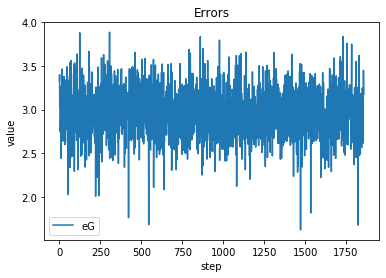

In [123]:
#Ploting Errors
plt.plot(errG, label='eG')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('step')
plt.legend()
plt.title('Errors')
plt.savefig('errors.png')

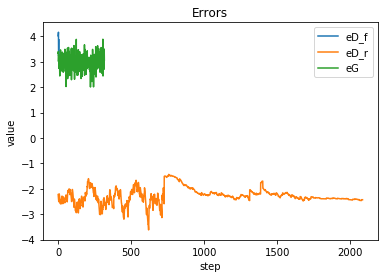

In [111]:
%matplotlib inline 
import matplotlib.pyplot as plt

#Ploting Errors
plt.plot(errD_fake, label='eD_f')
plt.plot(errD_real, label='eD_r')
plt.plot(errG, label='eG')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('step')
plt.legend()
plt.title('Errors')
plt.savefig('errors.png')

In [4]:
#Read classifier stats from files
p = pd.read_csv("performance.csv", sep= ',')
testc_labeled = p.iloc[:,0]
train_loss = p.iloc[:,1]
trainc_labeled = p.iloc[:,2]
trainlib_size = p.iloc[:,3]
p.describe()

,trainc_labeled,train_lib_size
count,246.000000,246.0
mean,0.447520,0.0
std,0.483303,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.980000,0.0
max,1.000000,0.0


Text(0.5, 1.0, 'Classification Performance')

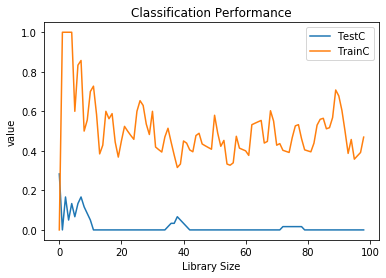

In [23]:
%matplotlib inline 
import matplotlib.pyplot as plt

#Ploting Errors
plt.plot(testc_labeled, label='TestC')
plt.plot(trainc_labeled, label='TrainC')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('Library Size')
plt.legend()
plt.title('Classification Performance')
#plt.savefig('classifier_perf.png')

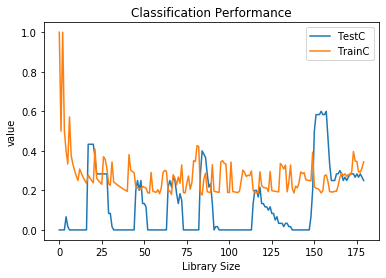

In [14]:
#Read classifier stats from files
p = pd.read_csv("rwg_performance.csv", sep= ',')
p.describe()
testc_labeled = p.iloc[:,0]
train_loss = p.iloc[:,1]
trainc_labeled = p.iloc[:,2]
trainlib_size = p.iloc[:,3]

%matplotlib inline 
import matplotlib.pyplot as plt

#Ploting Errors
plt.plot(testc_labeled, label='TestC')
plt.plot(trainc_labeled, label='TrainC')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('Library Size')
plt.legend()
plt.title('Classification Performance')
plt.savefig('classifier_generative_style_random.png')

In [11]:
#Read classifier stats from files
p = pd.read_csv("random_performance.csv", sep= ',')
p.describe()
# testc_labeled = p.iloc[:,0]
# train_loss = p.iloc[:,1]
# trainc_labeled = p.iloc[:,2]
# trainlib_size = p.iloc[:,3]

# %matplotlib inline 
# import matplotlib.pyplot as plt

# #Ploting Errors
# plt.plot(testc_labeled, label='TestC')
# plt.plot(trainc_labeled, label='TrainC')
# _ = plt.ylim()
# plt.ylabel('value')
# plt.xlabel('Library Size')
# plt.legend()
# plt.title('Classification Performance')
# #plt.savefig('classifier_perf.png')

,testc_labeled,train_loss,trainc_labeled,train_lib_size
count,1.0,1.000000,1.000000,1.0
mean,0.0,1.007115,0.745856,179.0
std,NaN,NaN,NaN,NaN
min,0.0,1.007115,0.745856,179.0
25%,0.0,1.007115,0.745856,179.0
50%,0.0,1.007115,0.745856,179.0
75%,0.0,1.007115,0.745856,179.0
max,0.0,1.007115,0.745856,179.0
